In [35]:
import selfies as sf

In [36]:
#molecule = 'CCCCC'
molecule = 'CS(=O)(=O)C1=CC=C(C=C1)C2=C(C(=O)OC2)C3=CC=CC=C3' #DiOcthylHexaEthylAmine (DOHE)

# SMILES -> SELFIES -> SMILES translation
try:
    molecule_sf = sf.encoder(molecule)  # [C][=C][C][=C][C][=C][Ring1][=Branch1]
    molecule_smi = sf.decoder(molecule_sf)  # C1=CC=CC=C1
    print('conversion sucessful')
    
except sf.EncoderError:
    print('Error from conversion smiles -> selfies')
    pass  # sf.encoder error!
except sf.DecoderError:
    print('Error from conversion selfies -> smiles')
    pass  # sf.decoder error!

conversion sucessful


In [37]:
molecule_sf

'[C][S][=Branch1][C][=O][=Branch1][C][=O][C][=C][C][=C][Branch1][Branch1][C][=C][Ring1][=Branch1][C][=C][Branch1][=Branch2][C][=Branch1][C][=O][O][C][Ring1][=Branch1][C][=C][C][=C][C][=C][Ring1][=Branch1]'

---
# Networkx/pysmiles and wiener index/graph representation
Networkx can build graphs, show connections, matrix representation, wiener index calculation
pysmiles, read and create smiles, can convert a SMILES directly to a networkx format

---

In [1]:
import networkx as nx
import pysmiles as ps

In [2]:
#dodecane = CCCCO'CCCCCCCCCCCC'
dodecane = 'CCCCCCCC'
mol = ps.read_smiles(dodecane) #this convert the smiles to a graph representation

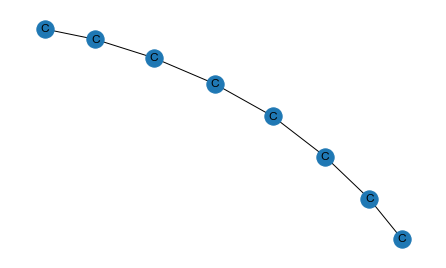

In [49]:
#plot the graph
import matplotlib.pyplot as plt
elements = nx.get_node_attributes(mol, name = "element")
nx.draw(mol, with_labels=True, labels = elements, pos=nx.spring_layout(mol) )
plt.gca().set_aspect('equal')

In [9]:
# atom vector (C only)
print(mol.nodes(data='element'))
# adjacency matrix
print('Adjacency matix')
print(nx.to_numpy_matrix(mol))
print(nx.to_numpy_matrix(mol)[1,1])


[(0, 'C'), (1, 'C'), (2, 'C'), (3, 'C'), (4, 'C'), (5, 'C'), (6, 'C'), (7, 'C')]
Adjacency matix
[[0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]
0.0


In [15]:

"""
ABC(G) = sum a,b in edges sqrt{ (deg(a)+deg(b)-2)/(deg(a)*deg(b))}
or
ABC(G) = sum a,b in nodes sqrt(...) *Aji
"""
import numpy as np
g = mol
total = 0
for a in g.nodes:
    for b in g.nodes:
        total += 0.5*np.sqrt(  (g.degree[a]+g.degree[b] - 2)/(g.degree[a]*g.degree[b]))*nx.to_numpy_matrix(g)[a,b]

print(total)


0
1
1
2
1
2
1
2
1
2
1
2
1
2
0
1
1
2
2
4
2
4
2
4
2
4
2
4
2
4
1
2
1
2
2
4
2
4
2
4
2
4
2
4
2
4
1
2
1
2
2
4
2
4
2
4
2
4
2
4
2
4
1
2
1
2
2
4
2
4
2
4
2
4
2
4
2
4
1
2
1
2
2
4
2
4
2
4
2
4
2
4
2
4
1
2
1
2
2
4
2
4
2
4
2
4
2
4
2
4
1
2
0
1
1
2
1
2
1
2
1
2
1
2
1
2
0
1
4.9497474683058345


### Calculate the Wiener Index

In [67]:
print("The wiener index is:",nx.wiener_index(mol))


The wiener index is: 286.0


In [68]:
#nx.to_numpy_matrix(mol, weight='order')

In [69]:
dohe = 'CS(=O)(=O)C1=CC=C(C=C1)C2=C(C(=O)OC2)C3=CC=CC=C3' #DiOcthylHexaEthylAmine DohA
mol2 = ps.read_smiles(dohe)

In [70]:
# atom vector (C only)
print(mol2.nodes(data='element'))
# adjacency matrix
print(nx.to_numpy_matrix(mol2))
print("The Wiener index is:",nx.wiener_index(mol2))

[(0, 'C'), (1, 'S'), (2, 'O'), (3, 'O'), (4, 'C'), (5, 'C'), (6, 'C'), (7, 'C'), (8, 'C'), (9, 'C'), (10, 'C'), (11, 'C'), (12, 'C'), (13, 'O'), (14, 'O'), (15, 'C'), (16, 'C'), (17, 'C'), (18, 'C'), (19, 'C'), (20, 'C'), (21, 'C')]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 

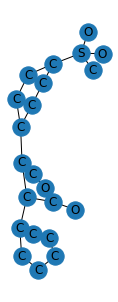

In [71]:
#plot the graph
import matplotlib.pyplot as plt
elements = nx.get_node_attributes(mol2, name = "element")
nx.draw(mol2, with_labels=True, labels = elements, pos=nx.spring_layout(mol2) )
plt.gca().set_aspect('equal')

In [72]:
print(nx.wiener_index(mol2))
print(nx.density(mol2) )
print(nx.radius(mol2) )
print("")
print(nx.wiener_index(mol))
print(nx.density(mol) )
print(nx.radius(mol) )
#print(nx.pagerank_scipy(mol) )


1061.0
0.1038961038961039
6

286.0
0.16666666666666666
6


In [73]:
print(nx.average_node_connectivity(mol2))

1.173160173160173


In [74]:
#wiener index...
def wienerindex(G):
    wiener = 0
    path = nx.all_pairs_shortest_path_length(G)
    dpath = {x[0]:x[1] for x in path}  
    
    #print(dpath)
    
    for i in range(0,G.number_of_nodes(),1):
        for j in range(0,G.number_of_nodes(),1):
            #print("camino:",dpath[i][j])
            #print("i:",i,"j:",j, " Gnumernode:", G.number_of_nodes())
            #wiener = wiener + dpath[i][j]*G.degree[i]*G.degree[j]
            wiener = wiener + dpath[i][j]
       # print("")
    return wiener/2

In [75]:
def zagrebindex(G):
    zagreb = 0
    for i in range(0,G.number_of_nodes(),1):
        #print("i:",i, "degree:",mol3.degree[i])
        zagreb = zagreb + (G.degree[i]*G.degree[i])
    return zagreb

In [76]:
def mzagrebindex(G):
    zagreb = 0
    for i in range(0,G.number_of_nodes(),1):
        #print("i:",i, "degree:",mol3.degree[i])
        zagreb = zagreb + 1/(G.degree[i]*G.degree[i])
    return zagreb

In [77]:
#ranjini et al 2013
#modified second zagreb index
def zagreb2index(G):
    zagreb = 0
    for i in range(0,G.number_of_nodes(),1):
        for j in range(0,G.number_of_nodes(),1):
            #print("i:",i, "degree:",mol3.degree[i])
            zagreb = zagreb + (G.degree[i]+G.degree[j])/(G.degree[i]*G.degree[j])
    return zagreb

In [78]:
#ranjini et al 2013
#modified second zagreb index

def zagreb3index(G):  
    zagreb = 0
    for i in range(0,G.number_of_nodes(),1):
        for j in range(0,G.number_of_nodes(),1):
            #print("i:",i, "degree:",mol3.degree[i])
            zagreb = zagreb + (G.degree[i]*G.degree[j])*(G.degree[i]+G.degree[j])
    return zagreb

In [79]:
octane = 'CCCCCCCC'
mol3 = ps.read_smiles(octane) #this 


print("Zagreb 0 index:", wienerindex(mol), " wiener index:", nx.wiener_index(mol))
print("Zagreb 0 index:", wienerindex(mol2), " wiener index:", nx.wiener_index(mol2))
print("Zagreb 0 index:", wienerindex(mol3), " wiener index:", nx.wiener_index(mol3))
print("")

print("Zagreb index:", zagrebindex(mol))
print("Zagreb index:", zagrebindex(mol2))
print("Zagreb index:", zagrebindex(mol3))
print("")
print("Modified Zagreb index:", mzagrebindex(mol))
print("Modified Zagreb index:", mzagrebindex(mol2))
print("Modified Zagreb index:", mzagrebindex(mol3))
print("")
print("Zagreb 2 index:", zagreb2index(mol))
print("Zagreb 2 index:", zagreb2index(mol2))
print("Zagreb 2 index:", zagreb2index(mol3))
print("")
print("Zagreb 3 index:", zagreb3index(mol))
print("Zagreb 3 index:", zagreb3index(mol2))
print("Zagreb 3 index:", zagreb3index(mol3))

Zagreb 0 index: 286.0  wiener index: 286.0
Zagreb 0 index: 1061.0  wiener index: 1061.0
Zagreb 0 index: 84.0  wiener index: 84.0

Zagreb index: 42
Zagreb index: 118
Zagreb index: 26

Modified Zagreb index: 4.5
Modified Zagreb index: 7.479166666666665
Modified Zagreb index: 3.5

Zagreb 2 index: 168.0
Zagreb 2 index: 516.9999999999987
Zagreb 2 index: 80.0

Zagreb 3 index: 1848
Zagreb 3 index: 11328
Zagreb 3 index: 728


#L = nx.normalized_laplacian_matrix(mol2)


# see IGraph

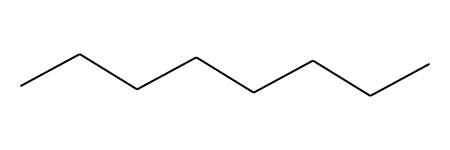

In [50]:
from rdkit import Chem
from rdkit.Chem import Descriptors as d
from rdkit.ML.Descriptors import MoleculeDescriptors as dML
import numpy as np


mymolecule = 'CCCCCCCC'

m = Chem.MolFromSmiles(mymolecule)
m

In [2]:
d.ExactMolWt(m)

122.036779432

In [3]:
d.fr_amide(m)

0

In [4]:
m = Chem.MolFromSmiles('CO carbon monoxide')
m.GetProp('_Name')

'carbon monoxide'

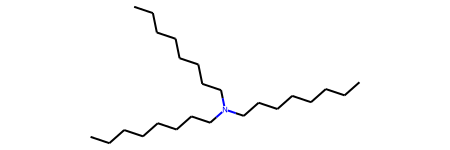

In [2]:
#m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
m = Chem.MolFromSmiles('CCCCCCCCN(CCCCCCCC)CCCCCCCC')
m

In [14]:
calc = dML.MolecularDescriptorCalculator([x[0] for x in d._descList])
calc.GetDescriptorNames()

('MaxEStateIndex',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_

In [15]:
calc.pK_BHX(m)

AttributeError: 'MolecularDescriptorCalculator' object has no attribute 'pK_BHX'

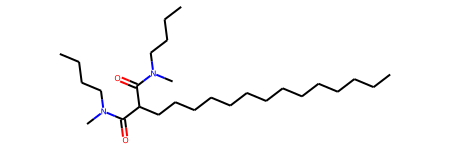

In [9]:
m = Chem.MolFromSmiles('CCCCCCCCCCCCCCC(C(=O)N(C)CCCC)C(=O)N(C)CCCC')
m

In [87]:
MaxAbsPartialCharge          0.273801
BalabanJ                     0.374780
HallKierAlpha                0.331723
Kappa2                       0.213915
Kappa3                       0.288019
PEOE_VSA1                    0.329811
PEOE_VSA12                   0.277833
SMR_VSA1                     0.301543
SMR_VSA6                     0.363292
SlogP_VSA2                   0.227851
SlogP_VSA3                   0.252993
EState_VSA10                 0.299566
EState_VSA2                  0.287406
EState_VSA5                  0.209991
FractionCSP3                 0.307532
NumRotatableBonds            0.234273
fr_C_O                       0.242308
fr_C_O_noCOO                 0.209140
fr_Ndealkylation1            0.334748
fr_amide                     0.208633
fr_ether                     0.211800

SyntaxError: invalid syntax (3803855167.py, line 1)

In [93]:
print(d.BalabanJ(m))
print(d.BertzCT(m))
print(d.fr_amide(m))
print('Number of non-H atoms:',d.HeavyAtomCount(m))
print('Weight of all heavy atoms (no H):',d.HeavyAtomMolWt(m))
print(d.NHOHCount(m))
print(d.NOCount(m))
print(d.NumHDonors(m))
print('Exact molar weight:',d.ExactMolWt(m))
print(d.NumHeteroatoms(m))
print(d.NumRotatableBonds(m))
print(d.NumValenceElectrons(m))
#print(d.NumAmideBonds(m))
print(d.HallKierAlpha(m))
print('Number of C-O bonds:',d.fr_C_O(m))
print(d.fr_C_O_noCOO(m))
print(d.fr_Ndealkylation1(m))
############
#print(d.eccentricity(m))
print('Number of amides:',d.fr_amide(m))
print('Number of ether',d.fr_ether (m))
print('MolLogP:',d.MolLogP(m))

4.271235262658877
412.95237065456854
2
Number of non-H atoms: 31
Weight of all heavy atoms (no H): 384.3090000000002
0
4
0
Exact molar weight: 438.418528968
4
21
184
-1.06
Number of C-O bonds: 2
2
0
Number of amides: 2
Number of ether 0
MolLogP: 7.210800000000008


In [71]:
m = []
for i in range(0,50):
    if(i  == 0 ):
        m.append('C')
    else:
        m.append(m[i-1]+'C')

print(m)

['C', 'CC', 'CCC', 'CCCC', 'CCCCC', 'CCCCCC', 'CCCCCCC', 'CCCCCCCC', 'CCCCCCCCC', 'CCCCCCCCCC', 'CCCCCCCCCCC', 'CCCCCCCCCCCC', 'CCCCCCCCCCCCC', 'CCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCC

In [83]:
mAlkyls = []
for i in range(0,50):
    mAlkyls.append( Chem.MolFromSmiles(m[i]))

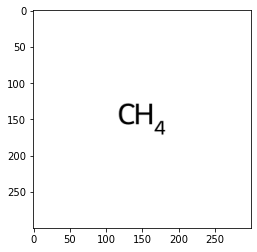

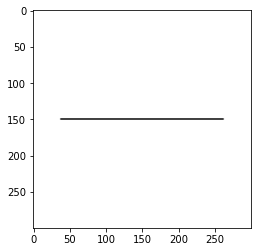

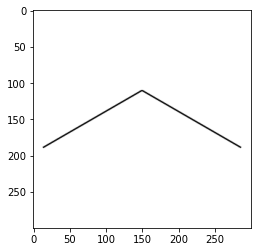

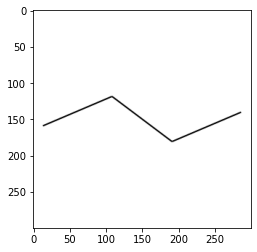

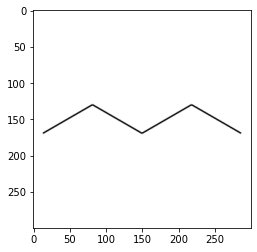

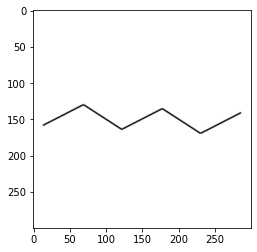

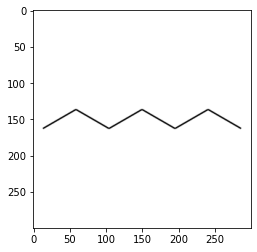

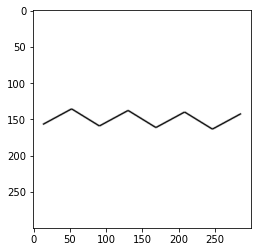

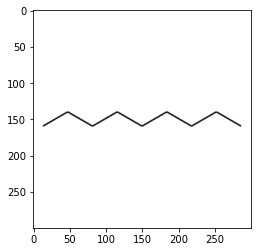

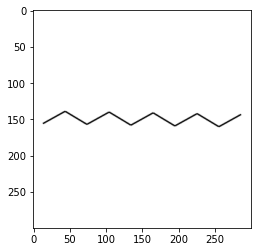

In [42]:
import matplotlib.pyplot as plt

for i in range(0,10): 
    fig, ax = plt.subplots()
    ax.imshow(  Chem.Draw.MolToImage(mAlkyls[i]) )

In [55]:
def wiener_index(m):
    res = 0
    amat = Chem.GetDistanceMatrix(m)
    num_atoms = m.GetNumAtoms()
    for i in range(num_atoms):
        for j in range(i+1,num_atoms):
            res += amat[i][j]
    return res

In [84]:
x = np.arange(50)
wiener = np.zeros(50)
for i,el in enumerate(mAlkyls):
    wiener[i] = wiener_index(mAlkyls[i])
    #print(i)

In [57]:
import pandas as pd

In [85]:
df = pd.DataFrame()
df['Ncarbon'] = x
df['wiener'] = wiener

In [77]:
df.head(10)

,Ncarbon,wiener
0,0,0.0
1,1,1.0
2,2,4.0
3,3,10.0
4,4,20.0
5,5,35.0
6,6,56.0
7,7,84.0
8,8,120.0
9,9,165.0


<AxesSubplot:xlabel='Ncarbon', ylabel='wiener'>

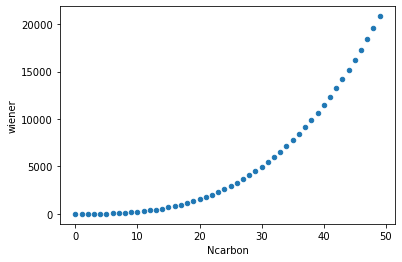

In [88]:
df.plot(x = 'Ncarbon' , y='wiener', marker='o', kind='scatter')